<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [7]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [8]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [9]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# __Task 1: Become familiar with the dataset__

#### The following describes the dataset variables:

+      CRIM - per capita crime rate by town

+      ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

+      INDUS - proportion of non-retail business acres per town.

+      CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

+      NOX - nitric oxides concentration (parts per 10 million)

+      RM - average number of rooms per dwelling

+      AGE - proportion of owner-occupied units built prior to 1940

+      DIS - weighted distances to five Boston employment centres

+      RAD - index of accessibility to radial highways

+      TAX - full-value property-tax rate per $10,000

+      PTRATIO - pupil-teacher ratio by town

+      LSTAT - % lower status of the population

+      MEDV - Median value of owner-occupied homes in $1000's

# __Task 2: Generate Descriptive Statistics and Visualizations__

### For all visualizations, please include a title in each graph and appropriate labels.
### Generate the following and explain your findings:
+ ### **For the "Median value of owner-occupied homes" provide a boxplot**

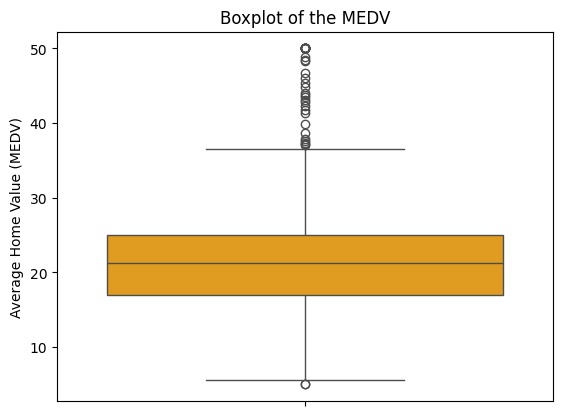

In [5]:
sns.boxplot(y='MEDV', color='orange', data=boston_df)
plt.title('Boxplot of the MEDV')
plt.ylabel('Average Home Value (MEDV)')
plt.show()

**Conclusion:** This box plot identifies outliers and the overall distribution of median home values.  

+ ### **Provide a  bar plot for the Charles river variable**

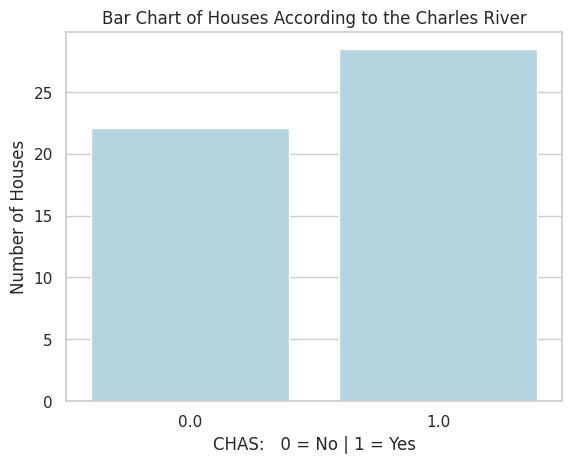

In [6]:
chas_medv = boston_df.groupby('CHAS')['MEDV'].mean().reset_index()
sns.set(style='whitegrid')
sns.barplot(x='CHAS', y='MEDV', color='lightblue', data=chas_medv)
plt.title('Bar Chart of Houses According to the Charles River')
plt.xlabel('CHAS:   0 = No | 1 = Yes')
plt.ylabel('Number of Houses')
plt.show()

**Conclusion:** This bar chart shows how many homes are bordered by the Charles River, helping to assess the impact of this location on housing values.  

+ ### **Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)**

In [7]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 YEARS AND YOUNGER'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70 ), 'AGE_GROUP'] = 'BETWEEN 35 AND 70 YEARS'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 YEARS AND OLDER'

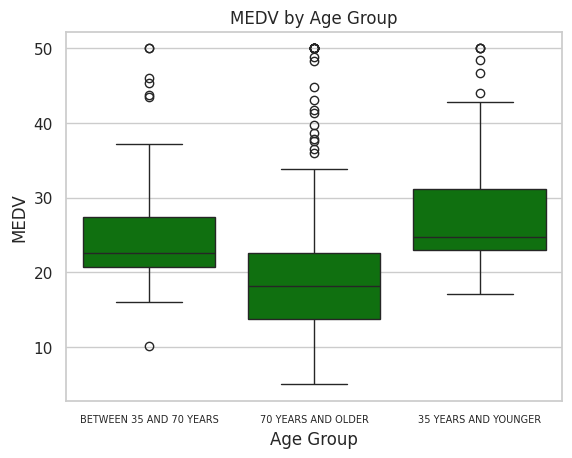

In [8]:
sns.boxplot(x='AGE_GROUP' ,y='MEDV', color='green', data=boston_df)
plt.title('MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('MEDV')
plt.xticks(fontsize=7)
plt.show()

**Conclusion:** This box plot allows us to compare the median values of houses based on the age of the buildings.

+ ### **Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?**

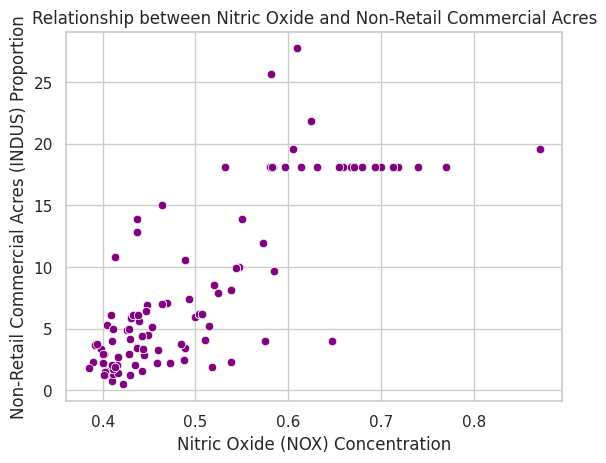

In [21]:
sns.scatterplot(x='NOX', y='INDUS', color='purple', data=boston_df)
plt.title('Relationship between Nitric Oxide and Non-Retail Commercial Acres')
plt.xlabel('Nitric Oxide (NOX) Concentration')
plt.ylabel('Non-Retail Commercial Acres (INDUS) Proportion')
plt.show()


**Conclusion:** This scatterplot diagram helps us assess whether there is a linear relationship between pollution (NOX) and commercial development (INDUS). A high correlation would indicate a possible association. 

+ ### **Create a histogram for the pupil to teacher ratio variable**

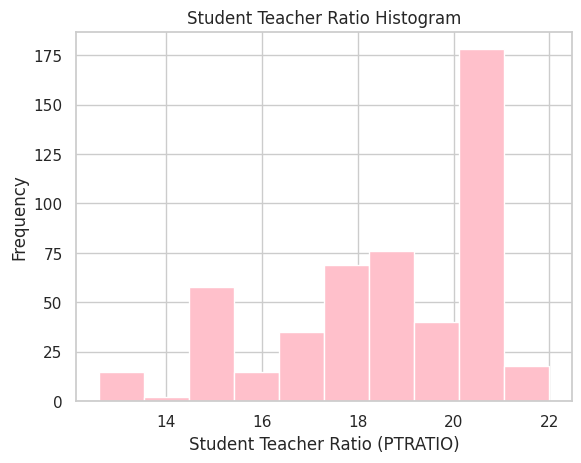

In [26]:
plt.hist(boston_df['PTRATIO'], color="pink")
plt.title('Student Teacher Ratio Histogram')
plt.xlabel('Student Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

**Conclusion:** This histogram of the variable 'PTRATIO' describes the distribution of the student-teacher ratio, useful for understanding educational conditions in cities. 

# __Task 3: Use the appropriate tests to answer the questions provided.__

## For each of the following questions; (Be sure to: State your hypothesis, Use α = 0.05, Perform the test Statistics, State the conclusion from the test.)

### **Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

#### Hypothesis:
+ H₀: There is no significant difference in the median home value between areas bounded by the Charles River and those not bounded by the Charles River (μ₁ = μ₂).
+ H₁: There is a significant difference in the median home value (μ₁ != μ₂).

In [20]:
t_test = scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')
print(t_test)
if p_value < 0.05:
    print(f"We reject H₀ because p-value < 0.05")
else:
    print(f"We cannot reject H₀ because p_value > 0.05")

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)
We reject H₀ because p-value < 0.05


**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis.

### **Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

#### Hypothesis:
+ H₀: There are no significant differences in median home values ​​across groups of proportions of owner-occupied units built before 1940.
+ H₁: At least one group has a different median home value.

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_GROUP'] = '35 YEARS AND YOUNGER'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70 ), 'AGE_GROUP'] = 'BETWEEN 35 AND 70 YEARS'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_GROUP'] = '70 YEARS AND OLDER'

group1 = boston_df[boston_df['AGE_GROUP'] == '35 YEARS AND YOUNGER']['MEDV']
group2 = boston_df[boston_df['AGE_GROUP'] == 'BETWEEN 35 AND 70 YEARS']['MEDV']
group3 = boston_df[boston_df['AGE_GROUP'] == '70 YEARS AND OLDER']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(group1, group2, group3)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic, p_value))

if p_value < 0.05:
    print(f"We reject H₀ because p-value < 0.05")
else:
    print(f"We cannot reject H₀ because p_value > 0.05")

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15
We reject H₀ because p-value < 0.05


**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis.

### **Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)**

#### Hypothesis:
+ H₀: There is no linear relationship between nitric oxide (NOX) concentration and proportion of non-retail commercial acres (INDUS).
+ H₁: There is a linear relationship between NOX and INDUS.

In [22]:
correlation, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print("Correlation: {0}, P-Value: {1}".format(correlation, p_value))

if p_value < 0.05:
    print(f"We reject H₀ because p-value < 0.05")
else:
    print(f"We cannot reject H₀ because p_value > 0.05")

Correlation: 0.7636514469209192, P-Value: 7.913361061210442e-98
We reject H₀ because p-value < 0.05


**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis.

### **What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

#### Hypothesis:
+ H₀: Weighted distance to employment centres (DIS) has no significant impact on the average value of dwellings (β = 0).
+ H₁: Weighted distance to employment centres (DIS) has a significant impact on the average value of dwellings (β != 0).

In [12]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        00:52:17   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Conclusion:** Since the p-value is less than 0.05, we reject the null hypothesis.